Nama : Kintari Nurul Utami<br>
NIM : 1301184464

In [15]:
!pip install shapely --no-binary shapely
!pip install fiona
!pip install pyproj
!pip install rtree
!pip install geopandas
!pip install geoplot
!pip install mapclassify
!pip install imageio
!pip install pathlib

In [17]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [18]:
Indo = gpd.read_file('INDONESIA_PROP.shp')
Indo.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


In [19]:
covid19 = pd.read_csv('Province.csv')
covid19.head()

,Province,Case,In Care,Death,Recovery,Percentase
0,DKI JAKARTA,4002,3271,370,361,42.08
1,JAWA BARAT,969,787,79,103,10.19
2,JAWA TIMUR,857,623,90,144,9.01
3,JAWA TENGAH,682,537,58,87,7.17
4,SULAWESI SELATAN,453,308,37,108,4.76


In [20]:
covid19_indo = Indo.merge(covid19, left_on="Propinsi", right_on="Province")
covid19_indo.head()

,ID,kode,Propinsi,SUMBER,geometry,Province,Case,In Care,Death,Recovery,Percentase
0,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ...",NUSATENGGARA BARAT,221,193,4,24,2.32
1,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1...",GORONTALO,15,14,1,0,0.16
2,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ...",SULAWESI TENGGARA,45,37,2,6,0.47
3,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01...",DAERAH ISTIMEWA YOGYAKARTA,93,47,7,39,0.98
4,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ...",JAWA TENGAH,682,537,58,87,7.17


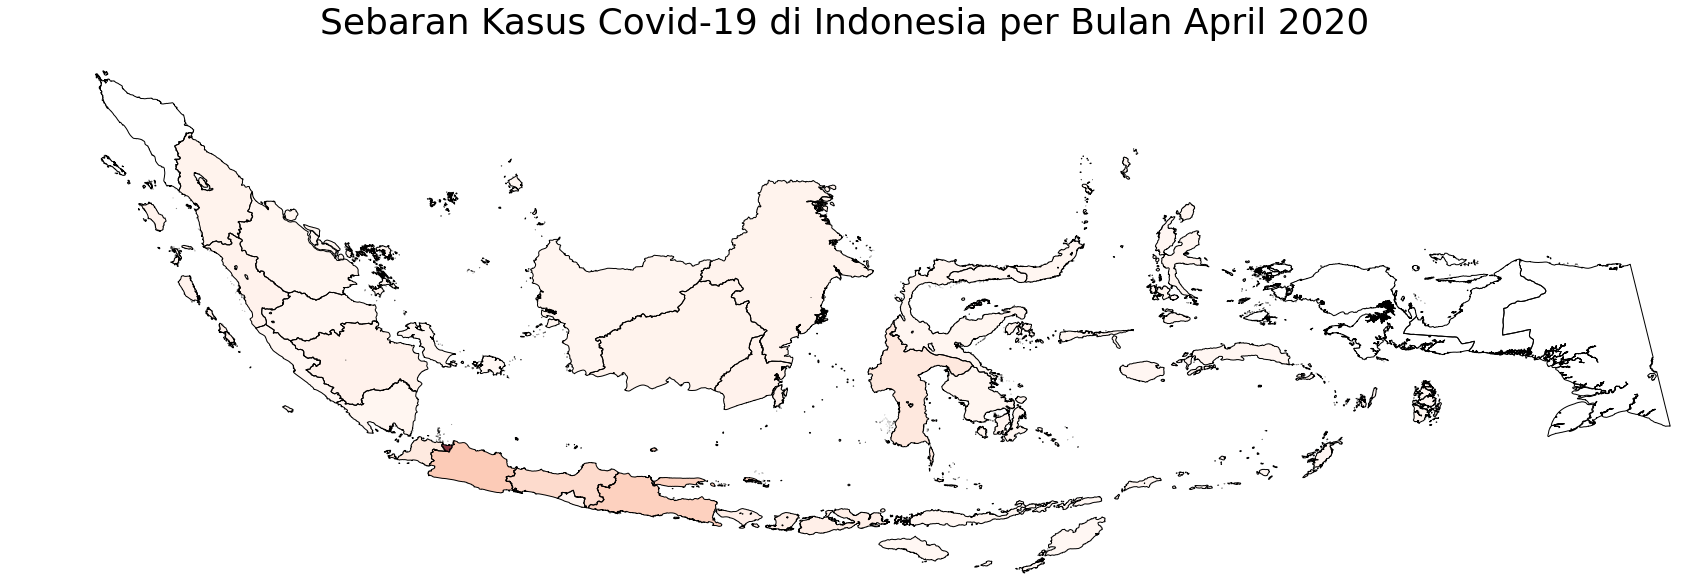

In [23]:
ax = gplt.choropleth(
    covid19_indo,
    hue="Case",
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
)

ax.set_title(
    "Sebaran Kasus Covid-19 di Indonesia per Bulan April 2020",
    fontsize=36
)

gplt.polyplot(Indo,
              ax=ax,
              extent=Indo.total_bounds,
              edgecolor="black",
              linewidth=1,
              zorder=1
)